<a href="https://colab.research.google.com/github/vardhikahegde/me/blob/main/brainstroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df = df.drop(['id'], axis=1)

In [3]:
df.shape[0]

5110

In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
df['stroke'].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [7]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30b6c58370>]],
      dtype=object)

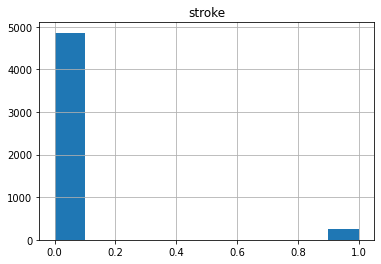

In [8]:
df.hist(column = 'stroke')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30b6ba67c0>]],
      dtype=object)

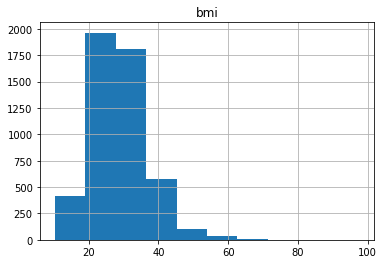

In [9]:
df.hist(column = "bmi")

In [10]:
df[df['gender'] == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [11]:
df = df.drop(df[df['gender'] == 'Other'].index)

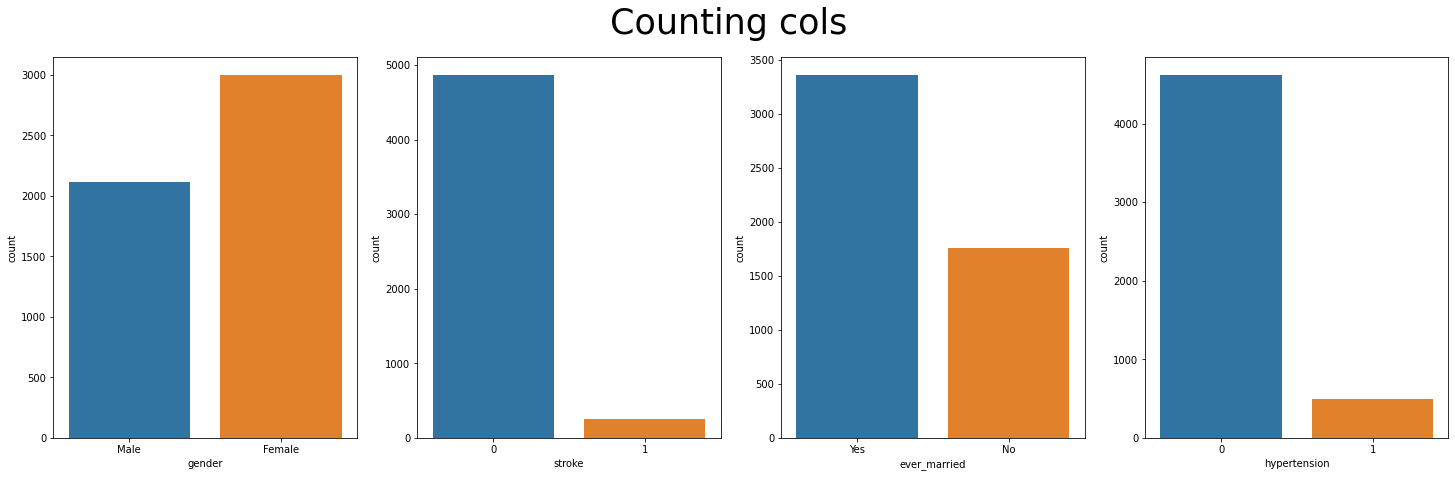

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(25,7))

fig.suptitle("Counting cols", fontsize=35)

sns.countplot(x="gender", data=df,ax=ax1)
sns.countplot(x="stroke", data=df,ax=ax2)
sns.countplot(x="ever_married", data=df,ax=ax3)
sns.countplot(x="hypertension", data=df,ax=ax4)

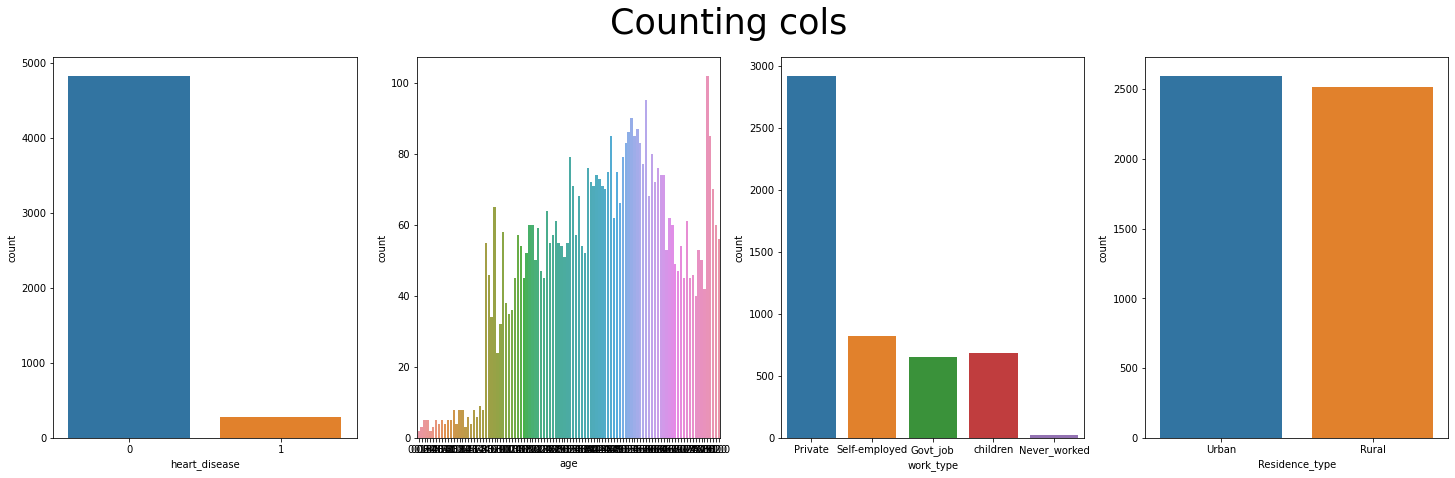

In [13]:
fig, (ax5, ax6, ax7, ax8) = plt.subplots(1,4,figsize=(25,7))
fig.suptitle("Counting cols", fontsize=35)
sns.countplot(x="heart_disease", data=df,ax=ax5)
sns.countplot(x="age", data=df,ax=ax6)
sns.countplot(x="work_type", data=df,ax=ax7)
sns.countplot(x="Residence_type", data=df,ax=ax8)

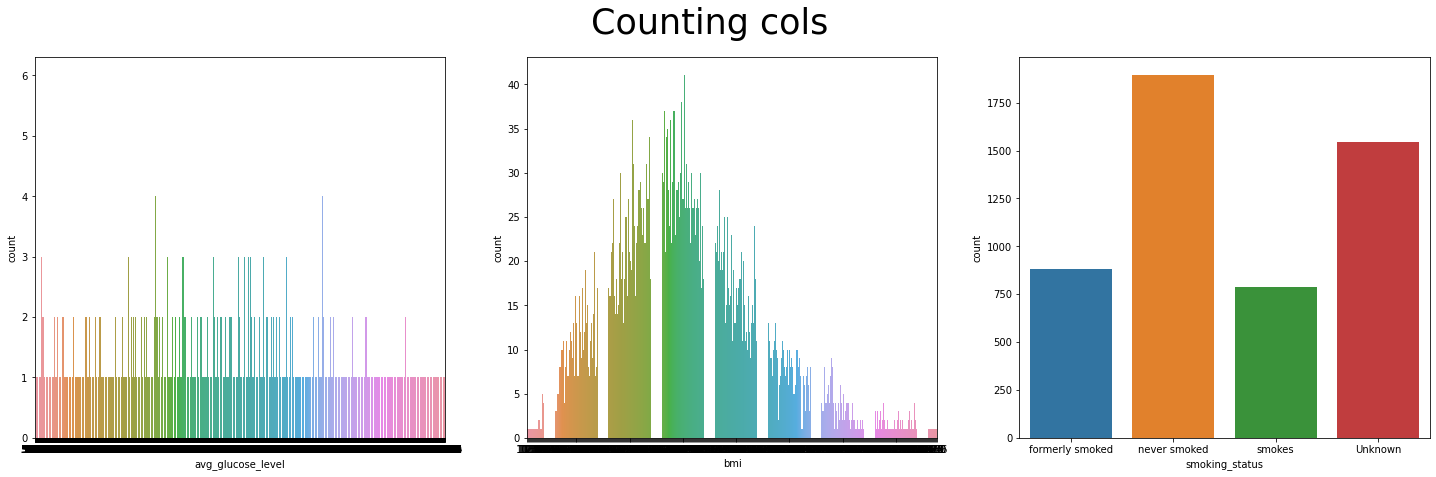

In [15]:
fig, (ax9, ax10, ax11) = plt.subplots(1,3,figsize=(25,7))
fig.suptitle("Counting cols", fontsize=35)
sns.countplot(x="avg_glucose_level", data=df,ax=ax9)
sns.countplot(x="bmi", data=df,ax=ax10)
sns.countplot(x="smoking_status", data=df,ax=ax11)

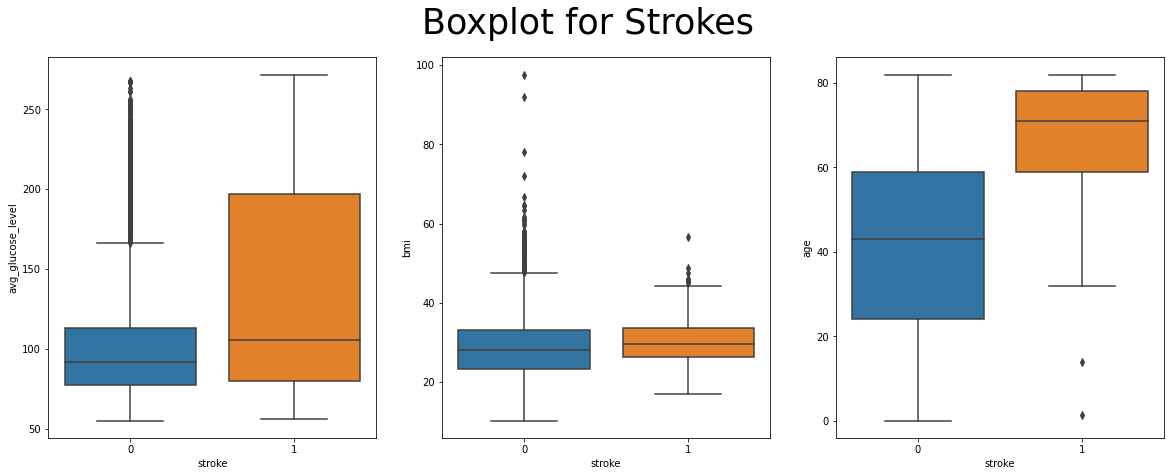

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,7))
fig.suptitle("Boxplot for Strokes", fontsize=35)

sns.boxplot(x="stroke", y="avg_glucose_level", data=df,ax=ax1)
sns.boxplot(x="stroke", y="bmi", data=df,ax=ax2)
sns.boxplot(x="stroke", y="age", data=df,ax=ax3)


In [17]:
temp = df
temp['stroke'] = temp['stroke'].astype(int)
residence_type_df = df.groupby(["Residence_type"])['stroke'].agg(['sum','count']).reset_index()
residence_type_df['risk of stroke'] = residence_type_df['sum'] / residence_type_df['count'] * 100
residence_type_df

,Residence_type,sum,count,risk of stroke
0,Rural,114,2513,4.536411
1,Urban,135,2596,5.200308


In [18]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [19]:
df[df['bmi'].isnull() & df["stroke"] == 1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.00,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.00,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.00,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.00,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
29,Male,59.00,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
43,Female,63.00,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
46,Female,75.00,0,1,No,Self-employed,Urban,109.78,NaN,Unknown,1
50,Female,76.00,0,0,No,Private,Urban,89.96,NaN,Unknown,1
51,Male,78.00,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1


In [20]:
df[df['smoking_status'].isnull() & df["stroke"] == 1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [21]:
temp = df
temp['stroke'] = temp['stroke'].astype(int)
work_type_df = df.groupby(["work_type"])['stroke'].agg(['sum','count']).reset_index()
work_type_df['risk of stroke'] = work_type_df['sum'] / work_type_df['count'] * 100
work_type_df

,work_type,sum,count,risk of stroke
0,Govt_job,33,657,5.022831
1,Never_worked,0,22,0.000000
2,Private,149,2924,5.095759
3,Self-employed,65,819,7.936508
4,children,2,687,0.291121


In [22]:
temp = df
temp['stroke'] = temp['stroke'].astype(int)
smoking_status_df = temp.groupby(["smoking_status"])['stroke'].agg(['sum','count']).reset_index()
smoking_status_df['risk of stroke'] = smoking_status_df['sum'] / smoking_status_df['count'] * 100
smoking_status_df

#suprisingly according to those who had stroke and their smoking status was logged formerly smoked status had a higher
#risk than currently smokes

,smoking_status,sum,count,risk of stroke
0,Unknown,47,1544,3.044041
1,formerly smoked,70,884,7.918552
2,never smoked,90,1892,4.756871
3,smokes,42,789,5.323194


In [23]:
temp = df
temp['stroke'] = temp['stroke'].astype(int)
ever_married_df = temp.groupby(["ever_married"])['stroke'].agg(['sum','count']).reset_index()
ever_married_df['risk of stroke'] = ever_married_df['sum'] / ever_married_df['count'] * 100
ever_married_df

# question is how correlated is this to age (older individuals have higher chance of having been married)
# -> is age really what is an important feature here or is marital status

,ever_married,sum,count,risk of stroke
0,No,29,1756,1.651481
1,Yes,220,3353,6.561288


In [24]:
# drop these columns to prevent answer leaking into data
df = df.drop('smoking_status', axis = 1)
df = df.drop('bmi', axis = 1)

In [25]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,1


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import numpy as np

In [27]:
encoder = OneHotEncoder(handle_unknown='ignore')

ct = ColumnTransformer([
    ('encoder', encoder, [0, 4, 5, 6])
], remainder='passthrough')

newDF = ct.fit_transform(df)

In [28]:
X, y = np.delete(newDF, -1, axis=1), newDF[:, -1]

In [29]:
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

smote_enn = SMOTEENN(random_state=0)


X_resampled, y_resampled = smote_enn.fit_resample(X, y)


smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

In [31]:
len(newDF[0])

16